In [3]:
!pip install coppeliasim_zmqremoteapi_client
!pip install numpy matplotlib pillow mediapipe


  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached mediapipe-0.10.11-cp38-cp38-win_amd64.whl.metadata (9.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.8 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached

In [5]:
!pip install opencv-python-headless

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.5 MB 7.0 MB/s eta 0:00:06
   ---------------------------------------- 0.3/38.5 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.5/38.5 MB 3.2 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.5 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.0/38.5 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.3/38.5 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.5 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.5 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.5 MB 3.7 MB/s eta 0:00:10
   -- ------------------------------------- 2.0/38.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.1/38.5 MB 3.9 MB/s eta 0:00:10
   -- ------------------------------------- 2.3/38.5 MB 3.9 MB/s eta 0:00:10
   -- 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\OBAS\\Documents\\Python_Scripts\\rl-based-cctv-placement-for-social-gesture-recognition\\.conda\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
import numpy as np
from coppeliasim_zmqremoteapi_client import *
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# import cv2
import time

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
detector = handDetector()

In [ ]:
factor = 100
rgbBuffer, resolution = sim.getVisionSensorImg(self.visionSens)
#.astype(np.uint8)
img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
#img_data = img_data[::-1, :, :]

image = img_data.astype(np.uint8)

img = self.detector.findHands(image)

lmList = self.detector.findPosition(image, draw=False)
if len(lmList)!=0:
    x1, y1 = lmList[4][1], lmList[4][2] # thump_tip
    x2, y2 = lmList[8][1], lmList[8][2] # index_finger_tip

    cx, cy = (x1+x2)//2, (y1+y2)//2 # find the midpoint of the line between 
    self.curr_pos = np.array([cx, 0, cy])/factor
    cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
    self.delta_pos = self.curr_pos - self.prev_pos
    
    self.prev_pos = self.curr_pos
    

    position = np.array(sim.getObjectPosition( self.target))
    new_position = position + self.delta_pos 
    sim.setObjectPosition( self.target, new_position)
#plt.imshow(img)
fps = 15
#cv2.putText(img, f'FPS: {int(fps)}', (40, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 3)
#plt.imsave(f'test_{t}.png', img)


#img = cv2.rotate(img, cv2.ROTATE_180)#_COUNTERCLOCKWISE
h,w,c = img.shape
#print(h,w,c)
#img = np.transpose(img, axes=[1,0,2])

image_bytes = img.tobytes()#cv2.imencode('.png', img)[1].tobytes()
simUI.setImageData(self.ui, 5007, image_bytes, w, h)
#simUI.setImageData(self.ui, 5007, image_bytes, h, w)

In [7]:
# create a client to connect to zmqRemoteApi server:
# (creation arguments can specify different host/port,
# defaults are host='localhost', port=23000)
client = RemoteAPIClient()

# get a remote object:
sim = client.require('sim')

# call API function:
h = sim.getObject('/Floor')
print(h)

19


In [ ]:
class socialGestureCCTV:

    def __init__(self):
        # create a client to connect to zmqRemoteApi server:
        # (creation arguments can specify different host/port,
        # defaults are host='localhost', port=23000)
        self.client = RemoteAPIClient()

        # get a remote object:
        self.sim = client.require('sim')

        self.visionSensorHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint/cctv')

        self.xHandle = sim.getObject('/camera/X_Joint')
        self.yHandle = sim.getObject('/camera/X_Joint/Y_Joint')
        self.rxHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint')
        self.ryHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint')

        self.sim.setStepping(True)
        pass

    def step(self, action):

        jointAngle = sim.getJointPosition(self.rxHandle) # return radian
        np.rad2deg(jointAngle)
        

        self.sim.step()
        img = self._getImage_()
        pass

    def render(self):

        img =self._getImage_()

        pass


    def reset(self):
        self.sim.startSimulation()

        startTime = self.sim.getSimulationTime()

        self.sim.stopSimulation()
        pass

    def close(self):

        pass

    def _getImage_(self):
        rgbBuffer, resolution = sim.getVisionSensorImg(self.visionSensorHandle)
        #.astype(np.uint8)
        img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
        #img_data = img_data[::-1, :, :]

        # img_data = cv2.flip(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB), 0)
        image = img_data.astype(np.uint8)
        return image
    


In [14]:
visionSensorHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint/cctv')

xHandle = sim.getObject('/camera/X_Joint')
yHandle = sim.getObject('/camera/X_Joint/Y_Joint')
rxHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint')
ryHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint')

In [16]:
jointAngle = sim.getJointPosition(rxHandle) # return radian
np.rad2deg(jointAngle)

-45.00000000000296

In [ ]:
_, resolution = sim.getVisionSensorImg(visionSensorHandle)

In [11]:
factor = 100
rgbBuffer, resolution = sim.getVisionSensorImg(visionSensorHandle)
#.astype(np.uint8)
img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
#img_data = img_data[::-1, :, :]

image = img_data.astype(np.uint8)

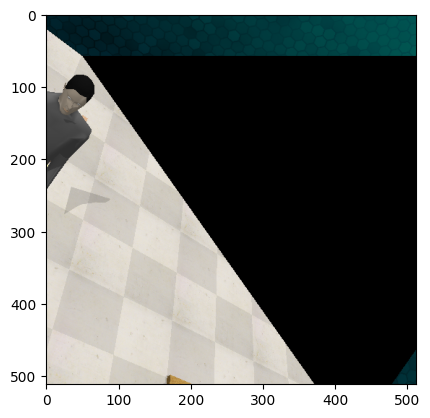

In [12]:
plt.imshow(image)

In [ ]:
x = sim.getObject('')

In [10]:
sim.startSimulation()

In [13]:
sim.stopSimulation()

In [ ]:
class handDetector():

	def __init__(self, mode=False, maxHand=2, detectionCon=0.5, trackCon=0.5):
	
		self.mode = mode
		self.maxHands = maxHand
		self.detectionCon = detectionCon
		self.trackCon = trackCon

		self.mpHands = mp.solutions.hands
		self.hands = self.mpHands.Hands(self.mode, max_num_hands = self.maxHands, min_detection_confidence = self.detectionCon, min_tracking_confidence = self.trackCon)
		self.mpDraw = mp.solutions.drawing_utils


	def findHands(self, img, draw=True):
		imgRGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
		self.results = self.hands.process(imgRGB)

		if self.results.multi_hand_landmarks:
			for hand_landmarks in self.results.multi_hand_landmarks:
				if draw:
					self.mpDraw.draw_landmarks(img, hand_landmarks, connections=self.mpHands.HAND_CONNECTIONS)
		return img

		
	def findPosition(self, img, handNo=0, draw=True):
		lmList = []
		if self.results.multi_hand_landmarks:
			myHand = self.results.multi_hand_landmarks[handNo]
			for id, lm in enumerate(myHand.landmark):
				h, w, c = img.shape

				cx, cy = int(lm.x * w), int(lm.y * h)

				lmList.append([id, cx, cy])

				if draw:
					cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
		return lmList
		